In [1]:
import numpy as np 
import pandas as pd
import jax.numpy as jnp 
import matplotlib.pylab as plt  
from getdist import plots, MCSamples
from utils.helpers import pickle_load

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 15

settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3}
color1 = '#50C878' #'#B5CA8D'
color3 = '#222E50'
alpha = 0.9
palefactor = 0.9
linewidth = 2 
contours = [0.68,0.95]

In [2]:
def triangle_plot(mcmc_samples, labels, subplot_size = 2, font_size = 18, fname = None):
    ndim = len(labels)
    colour = 'green'
    names = ["x%s"%i for i in range(ndim)]
    samples = MCSamples(samples=mcmc_samples,names = names, labels = labels, settings = settings)
    
    G = plots.getSubplotPlotter(subplot_size=subplot_size)
    samples.updateSettings({'contours': contours})
    G.settings.solid_contour_palefactor = 0.9
    G.settings.alpha_filled_add = 0.6
    G.settings.num_plot_contours = 2
    G.triangle_plot(samples, filled = True, line_args={'lw':linewidth, 'color':colour}, contour_colors=[colour])
    
    for i in range(0,ndim):
        for j in range(0, i+1):
            if i != j:
                ax = G.subplots[i,j]

                a, b = G.get_param_array(samples, ['x'+str(j), 'x'+str(i)])
                density = G.sample_analyser.get_density_grid(samples, a, b)
                density.contours = density.getContourLevels(contours)
                contour_levels = density.contours

                ax.contour(density.x, density.y, density.P, sorted(contour_levels), colors = colour, linewidths = linewidth) 
                ax.tick_params(axis = 'x', labelsize = font_size, rotation=45, pad=5)
                ax.tick_params(axis = 'y', labelsize = font_size, pad=5)
                ax.yaxis.label.set_size(font_size)
                ax.xaxis.label.set_size(font_size)
                ax.xaxis.labelpad = 20
                ax.yaxis.labelpad = 20
            else:
                ax = G.subplots[i,j]   

                dense = samples.get1DDensity('x'+str(i))
                dense.normalize(by='max')
                ax.plot(dense.x, dense.P, lw = linewidth+2, c = colour)

                ax.tick_params(axis = 'x', labelsize = font_size, rotation=45, pad=5)
                ax.tick_params(axis = 'y', labelsize = font_size, pad=5)
                ax.yaxis.label.set_size(font_size)
                ax.xaxis.label.set_size(font_size)
                ax.xaxis.labelpad = 20
                ax.yaxis.labelpad = 20
    # if fname is not None:
    #     os.makedirs('plots', exist_ok=True)
    #     plt.savefig(f'plots/triangle_plot_{fname}.pdf', bbox_inches = 'tight')
    # plt.close()
    plt.show()

In [3]:
colnames = ['weight', 'minuslogpost', 
            'sigma8', 'omegac', 'omegab', 'hubble', 'ns',
            'm1', 'm2', 'm3', 'm4',
            'dz_wl_1', 'dz_wl_2', 'dz_wl_3', 'dz_wl_4',
            'a_ia', 'eta',
            'b1', 'b2', 'b3', 'b4', 'b5',
            'dz_gc_1', 'dz_gc_2', 'dz_gc_3', 'dz_gc_4', 'dz_gc_5',
            'minuslogprior', 'minuslogprior__0', 'chi2',  'chi2__my_likelihood']

params = ['sigma8', 'omegac', 'omegab', 'hubble', 'ns',
            'm1', 'm2', 'm3', 'm4',
            'dz_wl_1', 'dz_wl_2', 'dz_wl_3', 'dz_wl_4',
            'a_ia', 'eta',
            'b1', 'b2', 'b3', 'b4', 'b5',
            'dz_gc_1', 'dz_gc_2', 'dz_gc_3', 'dz_gc_4', 'dz_gc_5']

In [4]:
samples = np.loadtxt('outputcobaya/jaxcosmo_2/output_prefix.1.txt')

In [34]:
samples[15635][2:-4]

array([ 8.9762737e-01,  2.4242528e-01,  4.0655434e-02,  6.4411386e-01,
        9.8133368e-01, -1.2947231e-02, -7.1786368e-04,  1.9322932e-02,
        4.5714871e-02,  1.7433590e-02, -3.1660156e-02,  6.0793674e-03,
       -8.1103721e-03,  6.9904783e-01, -3.4574956e-01,  1.2250969e+00,
        1.5409451e+00,  1.5757852e+00,  1.8915843e+00,  1.9090545e+00,
       -9.2937659e-03,  5.7982747e-03,  9.3478442e-03,  4.2877083e-03,
        9.3577780e-03])

In [26]:
# dataframe = pd.DataFrame(samples, columns=colnames)
# dataframe.to_csv('/home/arrykrishna/Desktop/test.csv')

In [5]:
nsamples = 15000
thinfactor = samples.shape[0] // nsamples
samples_thinned = samples[-thinfactor * nsamples::thinfactor]

## Triangle Plot

In [6]:
labels = [r'$\sigma_{8}$', r'$\Omega_{c}$', r'$\Omega_{b}$', r'$h$', r'$n_{s}$',
          r'$m_{1}$', r'$m_{2}$', r'$m_{3}$', r'$m_{4}$', 
          r'$\delta z_{1}^{(s)}$', r'$\delta z_{2}^{(s)}$', r'$\delta z_{3}^{(s)}$', r'$\delta z_{4}^{(s)}$',
          r'$A_{IA}$', r'$\eta$', r'$b_{1}$', r'$b_{2}$', r'$b_{3}$', r'$b_{4}$', r'$b_{5}$',
         r'$\delta z_{1}^{(g)}$', r'$\delta z_{2}^{(g)}$', r'$\delta z_{3}^{(g)}$', r'$\delta z_{4}^{(g)}$', r'$\delta z_{5}^{(g)}$']

In [7]:
labels_cosmo = labels[0:5]
labels_multiplicative = labels[5:9]
labels_shift_shear = labels[9:13]
labels_intrinsic = labels[13:15]
labels_bias = labels[15:20]
labels_shift_galaxy = labels[20:]

Removed no burn in


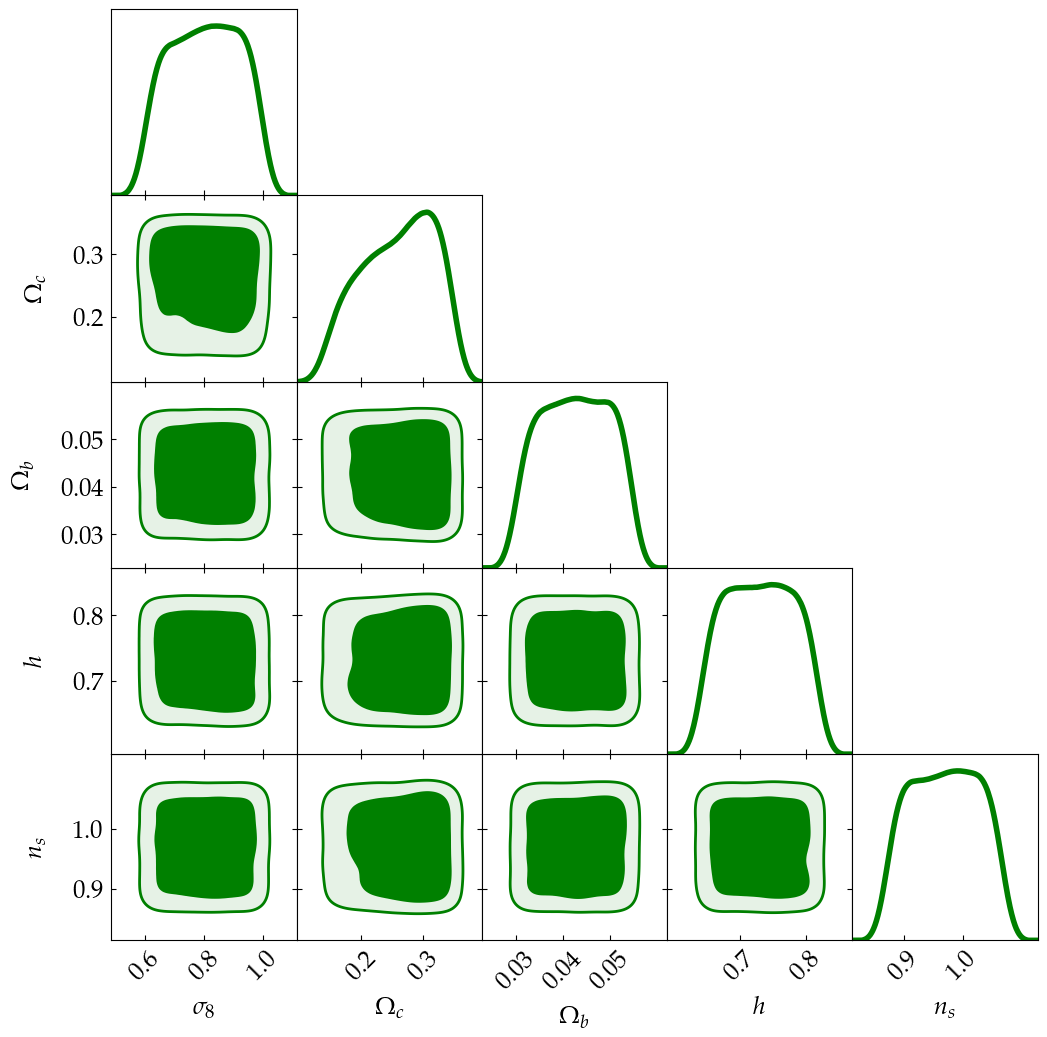

In [25]:
triangle_plot(samples_thinned[:,2:7], labels_cosmo)

In [37]:
divmod(2000, 10)[1] == 0

True